<a href="https://colab.research.google.com/github/SeunghyeChae/tmdhey/blob/main/deeplearning_basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 딥러닝

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full),(x_test, y_test)= load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
num_x_train= (x_train.shape[0])
num_x_val= (x_val.shape[0])
num_x_test= (x_test.shape[0])

print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))


학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
학습 데이터: (18000, 28, 28)	레이블: (18000,)
학습 데이터: (10000, 28, 28)	레이블: (10000,)


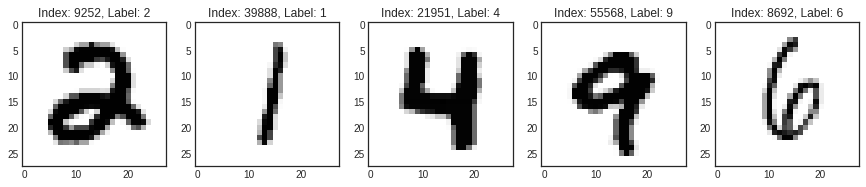

In [4]:
num_sample= 5
random_idxs= np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,3))
for i,idx in enumerate(random_idxs):
  img= x_train_full[idx,:]
  label= y_train_full[idx]

  plt.subplot(1, len(random_idxs),i+1)
  plt.imshow(img)
  plt.title('Index: {}, Label: {}'.format(idx,label))

In [5]:
# normalization
x_train = x_train/255.      # 0~255값을 가지는 것을 0~1로 normalization
x_val= x_val/255.
x_test= x_test/255.

y_train= to_categorical(y_train)  # 정답 0~9를 categorical로 변환
y_val= to_categorical(y_val)
y_test= to_categorical(y_test)

# 모델 구성(Sequential)

In [6]:
# list로 넣는게 간단함 / mnist는 (2)8,28) 이미지임 
model= Sequential([Input(shape=(28,28),name='input'),
                  Flatten(input_shape=[28,28], name='flatten'),
                  Dense(100, activation='relu', name='dense1'),
                  Dense(64, activation='relu', name='dense2'),
                  Dense(32, activation='relu', name='dense3'),
                  Dense(10, activation='softmax', name='output')]) 

model.summary()

# Flatten : 28*28 = 784  >> Dense layer로 100>64>32>10으로 신경망구성해서 줄임

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


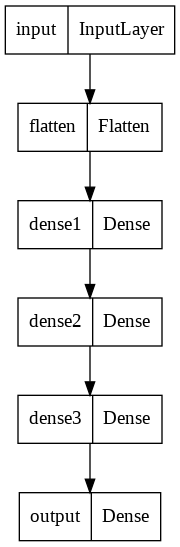

In [7]:
plot_model(model)

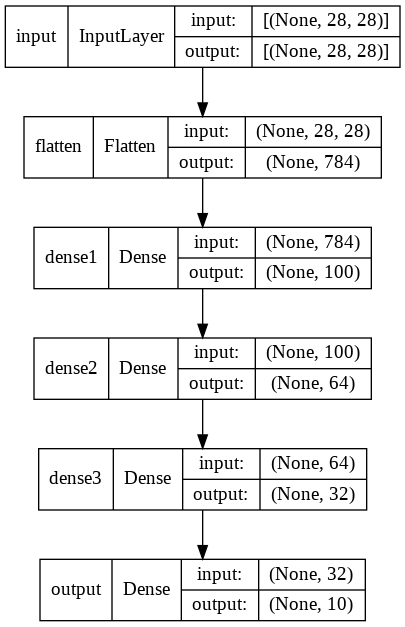

In [8]:
plot_model(model, show_shapes=True)

# model compile & training

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [10]:
history= model.fit(x_train,y_train,
                   epochs=50,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Epoch 1/50
329/329 [==============================] - 4s 6ms/step - loss: 1.6822 - acc: 0.5096 - val_loss: 0.9621 - val_acc: 0.7749
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6800 - acc: 0.8292 - val_loss: 0.5311 - val_acc: 0.8517
Epoch 3/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4660 - acc: 0.8714 - val_loss: 0.4191 - val_acc: 0.8792
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3920 - acc: 0.8899 - val_loss: 0.3733 - val_acc: 0.8909
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3500 - acc: 0.9004 - val_loss: 0.3319 - val_acc: 0.9044
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3205 - acc: 0.9089 - val_loss: 0.3188 - val_acc: 0.9062
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2977 - acc: 0.9150 - val_loss: 0.3171 - val_acc: 0.9060
Epoch 8/50
329/329 [==============================] - 1s 5ms/step - loss: 0.

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

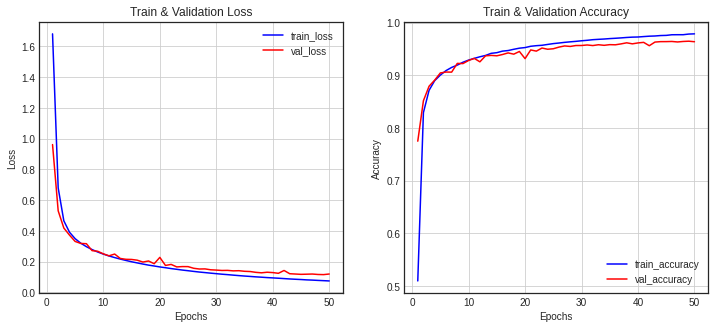

In [15]:
history_dict= history.history
# ------------------------------------------------------
loss= history_dict['loss']
val_loss= history_dict['val_loss']

epochs= range(1,len(loss)+1)
fig= plt.figure(figsize=(12,5))

ax1= fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train & Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# ------------------------------------------------------
accuracy= history_dict['acc']
val_accuracy= history_dict['val_acc']

ax2= fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train & Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()


# model 평가 및 예측

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1217 - acc: 0.9645


[0.12172146141529083, 0.9645000100135803]

In [18]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[7.3190243e-08 5.8768308e-08 1.3527684e-06 4.2127402e-05 2.3010474e-09
 3.4145071e-07 2.5793055e-11 9.9995494e-01 9.9784607e-08 9.8169744e-07]


Text(0.5, 1.0, 'Predicted label : 7')

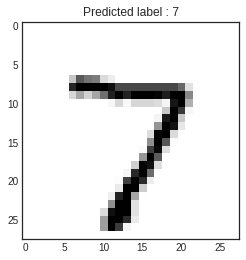

In [19]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title('Predicted label : {}'.format(arg_pred_y[0]))

# Confusion Matrix

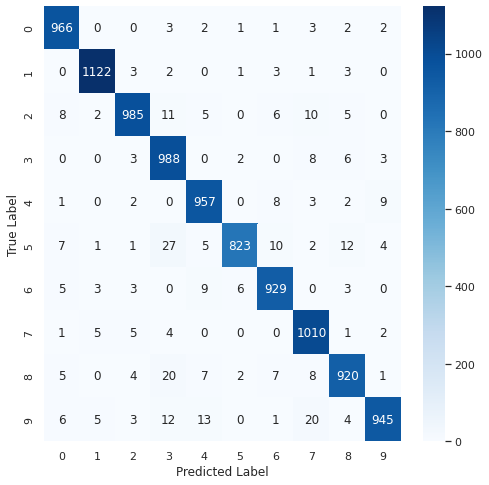

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8,8))
cm= confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 분류 보고서

In [27]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=1))) # 정답/ predicted

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.93      0.98      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.99      0.92      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### 모델 저장과 복원

- `save()`
- `load_model()`
- Sequencial API, 함수형 API에서는 모델의 저장 및 로드가 가능하지만 ,서브클래싱 방식으로는 할 수 없음
- 서브클래싱 방식은 `save_weights()`와 `load_weights()`를 이용해 모델의 파라미터만 저장 및 로드

- JSON 형식
  - `model.to_json()` (저장)
  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)
  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [28]:
model.save('mnist_model.h5')

In [29]:
loaded_model= models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 불러온 모델로 predict 해보자
pred_ys2= loaded_model.predict(x_test)
print(pred_ys2.shape)
np.set_printoptions(precision=7)  # (suppress=True) 도 깔끔하게 나옴
print(pred_ys2[0])

(10000, 10)
[7.3190243e-08 5.8768308e-08 1.3527684e-06 4.2127402e-05 2.3010474e-09
 3.4145071e-07 2.5793055e-11 9.9995494e-01 9.9784607e-08 9.8169744e-07]


Text(0.5, 1.0, 'Predicted label : 7')

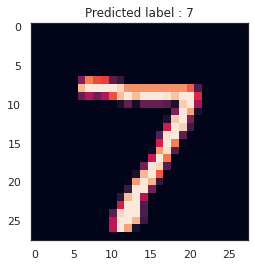

In [32]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.imshow(x_test[0])
plt.title('Predicted label : {}'.format(arg_pred_y2[0]))

### 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음
- 여러 개 사용 가능
- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용
- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용
- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, LearningRateScheduler, TensorBoard

#### ModelCheckpoint

In [34]:
check_point_cb= ModelCheckpoint('keras_mnist_model.h5')
history= model.fit(x_train,y_train, epochs=10,
                   callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0834 - acc: 0.9750
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0778 - acc: 0.9763
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0713 - acc: 0.9791
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0663 - acc: 0.9803
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0611 - acc: 0.9819
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0569 - acc: 0.9833
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0527 - acc: 0.9842
Epoch 8/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0491 - acc: 0.9858
Epoch 9/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0450 - acc: 0.9868
Epoch 10/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0424 - acc: 0.9877


In [37]:
# 최상의 모델만을 저장: `save_best_only=True`


check_point_cb= ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history= model.fit(x_train,y_train, epochs=10,
                   validation_data=(x_val,y_val),  # train으로 최상 모델 저장은 저장이 안될 수 있음 / val_loss로 줘야됨
                   callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0079 - acc: 0.9993 - val_loss: 0.1027 - val_acc: 0.9738
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0076 - acc: 0.9993 - val_loss: 0.1063 - val_acc: 0.9743
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0068 - acc: 0.9995 - val_loss: 0.1051 - val_acc: 0.9741
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0065 - acc: 0.9995 - val_loss: 0.1079 - val_acc: 0.9734
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0058 - acc: 0.9997 - val_loss: 0.1063 - val_acc: 0.9749
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.1092 - val_acc: 0.9741
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0052 - acc: 0.9997 - val_loss: 0.1066 - val_acc: 0.9749
Epoch 8/10
1313/1313 [==============================] - 4s 3ms

In [38]:
# 난 이렇게 하는게 편하드라구 

# ModelCheckpoint('저장할 위치', monitor='val_f1score' , # val_f1score max일 때를 보자 
#                                mode='max', verbose=0,save_best_only=True ,save_weights_only=False) 

#### EarlyStopping

- 일정 `patience` 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로, `epochs` 숫자를 크게 해도 무방
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [39]:
check_point_cb= ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb= EarlyStopping(patience=3, monitor='val_loss', 
                                 restore_best_weights=True)

history= model.fit(x_train,y_train, epochs=10,
                   validation_data=(x_val,y_val),  # train으로 최상 모델 저장은 저장이 안될 수 있음 / val_loss로 줘야됨
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0041 - acc: 0.9998 - val_loss: 0.1089 - val_acc: 0.9743
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0038 - acc: 0.9999 - val_loss: 0.1116 - val_acc: 0.9747
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0036 - acc: 0.9998 - val_loss: 0.1107 - val_acc: 0.9748
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0035 - acc: 0.9999 - val_loss: 0.1127 - val_acc: 0.9746
